In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [ ]:
# 資料1

In [2]:
x1 = [465., 521., 207., 62., 52.]
x2 = [423., 655., 406., 1320., 440.]

In [10]:
def avevar(xx):
    ave = 0.
    for x in xx:
        ave += x

    ave = ave / len(x1)

    var = 0.
    for x in xx:
        var += (x - ave)**2
    var = var / len(x1)
    
    return ave, var

In [80]:
def norm(xx, ave, var):
    xxx = []
    for x in xx:
        xxx.append((x - ave) / (var ** (1/2)))
        
    return xxx

In [77]:
ave, var = avevar(x1)
x1__ = norm(x1, ave, var*5/4)
print(x1__)
ave_, var_ = avevar(x1__)
print(avevar(x1__))

[0.9211509854029363, 1.174512749560915, -0.2461228566106076, -0.9021488530910877, -0.9473920252621553]
(1.3322676295501878e-16, 0.7999999999999999)


In [82]:
x1_ = [0.921, 1.175, -0.246, -0.902, -0.947]
x2_ = [-0.581, 0.016, -0.625, 1.727, -0.537]
ave_, var_ = avevar(x1_)
print(ave_, var_ *5/4)

0.00020000000000002237 0.9999487000000001


In [29]:
i = 3
j = 4
((x1_[i] - x1_[j])**2 + (x2_[i] - x2_[j])**2) ** (1/2)

2.264447173152865

In [34]:
i = 0
j = 1
c1_1 = (x1_[i] + x1_[j]) / 2
c1_2 = (x2_[i] + x2_[j]) / 2
print(c1_1)
print(c1_2)

1.048
-0.2825


In [37]:
i = 4
((x1_[i] - c1_1)**2 + (x2_[i] - c1_2)**2) ** (1/2)

2.011167633490555

In [39]:
i = 2
j = 4
c2_1 = (x1_[i] + x1_[j]) / 2
c2_2 = (x2_[i] + x2_[j]) / 2
print(c2_1)
print(c2_2)

-0.5965
-0.581


In [42]:
((c1_1 - c2_1)**2 + (c1_2 - c2_2)**2) ** (1/2)

1.6713714428576312

In [44]:
df = pd.DataFrame({ 's' : np.asarray(x1_),
                     'n' : np.asarray(x2_)})

/Users/yamada/.anyenv/envs/pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


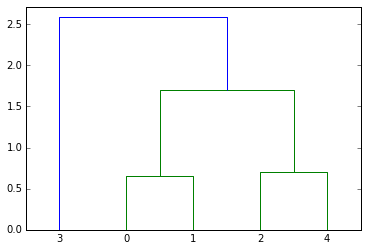

In [52]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

zipped = [[x1_[i], x2_[i]] for i in range(len(x1_))]
pdist = pdist((zipped))
result = linkage(pdist, method='average')
dendrogram(result)
plt.show()

In [54]:
a = (6, 4)
b = (-2, 2)
c = (0, -2)
d = (-2, 0)
ab = ((a[0] + b[0]) / 2, (a[1] + b[1]) / 2)
cd = ((c[0] + d[0]) / 2, (c[1] + d[1]) / 2)
print(ab, cd)

(2.0, 3.0) (-1.0, -1.0)


In [57]:
def dis_sq(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [65]:
dis_sq(cd, a)

74.0

In [83]:
bcd = ((b[0] + c[0] + d[0]) / 3, (b[1] + c[1] + d[1]) / 3)
print(bcd)

(-1.3333333333333333, 0.0)


In [73]:
dis_sq(a, c)

72

In [88]:
def ns():
    a = (6, 4)
    b = (0, -2)
    c = (-2, 2)
    d = (-2, 0)
    ac = ((a[0] + c[0]) / 2, (a[1] + c[1]) / 2)
    bd = ((b[0] + d[0]) / 2, (b[1] + d[1]) / 2)
    print(ac, bd)
    print()
    print(dis_sq(ac, a), dis_sq(bd, a))
    print(dis_sq(ac, b), dis_sq(bd, b))
    print(dis_sq(ac, c), dis_sq(bd, c))
    print(dis_sq(ac, d), dis_sq(bd, d))
    bcd = ((b[0] + c[0] + d[0]) / 3, (b[1] + c[1] + d[1]) / 3)
    print(bcd)
    print(dis_sq(a, a), dis_sq(bcd, a))
    print(dis_sq(a, b), dis_sq(bcd, b))
    print(dis_sq(a, c), dis_sq(bcd, c))
    print(dis_sq(a, d), dis_sq(bcd, d))
    

ns()

(2.0, 3.0) (-1.0, -1.0)

17.0 74.0
29.0 2.0
17.0 10.0
25.0 2.0
(-1.3333333333333333, 0.0)
0 69.77777777777777
72 5.777777777777778
68 4.444444444444445
80 0.44444444444444453


In [91]:
from sklearn.cluster import KMeans
a = [6, 4]
b = [0, -2]
c = [-2, 2]
d = [-2, 0]
data = np.asarray([a, b, c, d])

kmeans_model = KMeans(n_clusters=2, random_state=10).fit(data)
labels = kmeans_model.labels_
for label, d in zip(labels, data):
    print(label, d, d.sum())

1 [6 4] 10
0 [ 0 -2] -2
0 [-2  2] 0
0 [-2  0] -2


In [122]:
izakaya = pd.read_csv('../../Downloads/DL02045/Program/chap6/居酒屋.csv', index_col='メニュー')
# izakaya = pd.read_csv('../../Downloads/DL02045/Program/chap6/居酒屋.csv')
izakaya[0:1]

,こってり,遅さ,安さ,少なさ,馴染み
メニュー,,,,,
枝豆,1.68,1.448,4.142,2.808,4.84


In [118]:
izakaya_ = np.asarray(izakaya.values)
izakaya_

array([[ 1.68 ,  1.448,  4.142,  2.808,  4.84 ],
       [ 1.429,  1.662,  4.013,  3.481,  4.117],
       [ 1.348,  1.478,  4.043,  3.551,  4.246],
       [ 1.425,  1.63 ,  3.534,  3.26 ,  4.26 ],
       [ 2.705,  1.769,  3.795,  3.41 ,  4.154],
       [ 1.195,  1.468,  3.935,  3.662,  4.61 ],
       [ 3.319,  1.971,  3.826,  2.754,  3.507],
       [ 3.726,  2.945,  3.   ,  2.781,  2.466],
       [ 1.295,  1.872,  3.641,  3.705,  2.91 ],
       [ 4.221,  3.584,  2.818,  2.714,  4.675],
       [ 4.232,  3.043,  3.304,  3.145,  4.087],
       [ 4.466,  3.301,  2.89 ,  3.315,  3.11 ],
       [ 4.308,  2.641,  3.603,  2.192,  4.628],
       [ 3.727,  3.39 ,  3.299,  3.805,  3.675],
       [ 3.29 ,  3.391,  3.058,  3.754,  3.362],
       [ 3.671,  3.233,  3.082,  3.726,  4.479],
       [ 3.615,  3.397,  2.91 ,  3.692,  3.872],
       [ 3.078,  3.948,  2.779,  2.623,  3.935],
       [ 1.71 ,  2.449,  2.855,  3.565,  2.957],
       [ 1.877,  2.397,  2.027,  3.726,  4.219],
       [ 1.423,  2.5

In [119]:
kmeans_model = KMeans(n_clusters=4, random_state=10).fit(izakaya_)
labels = kmeans_model.labels_
for label, d in zip(labels, izakaya_):
    print(label, d)

1 [ 1.68   1.448  4.142  2.808  4.84 ] 14.918
1 [ 1.429  1.662  4.013  3.481  4.117] 14.702
1 [ 1.348  1.478  4.043  3.551  4.246] 14.666
1 [ 1.425  1.63   3.534  3.26   4.26 ] 14.109
1 [ 2.705  1.769  3.795  3.41   4.154] 15.833
1 [ 1.195  1.468  3.935  3.662  4.61 ] 14.87
0 [ 3.319  1.971  3.826  2.754  3.507] 15.377
0 [ 3.726  2.945  3.     2.781  2.466] 14.918
2 [ 1.295  1.872  3.641  3.705  2.91 ] 13.423
3 [ 4.221  3.584  2.818  2.714  4.675] 18.012
3 [ 4.232  3.043  3.304  3.145  4.087] 17.811
0 [ 4.466  3.301  2.89   3.315  3.11 ] 17.082
3 [ 4.308  2.641  3.603  2.192  4.628] 17.372
0 [ 3.727  3.39   3.299  3.805  3.675] 17.896
0 [ 3.29   3.391  3.058  3.754  3.362] 16.855
0 [ 3.671  3.233  3.082  3.726  4.479] 18.191
0 [ 3.615  3.397  2.91   3.692  3.872] 17.486
3 [ 3.078  3.948  2.779  2.623  3.935] 16.363
2 [ 1.71   2.449  2.855  3.565  2.957] 13.536
2 [ 1.877  2.397  2.027  3.726  4.219] 14.246
2 [ 1.423  2.564  2.654  3.462  3.269] 13.372
2 [ 2.455  2.39   2.052  3.818  2.9

/Users/yamada/.anyenv/envs/pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


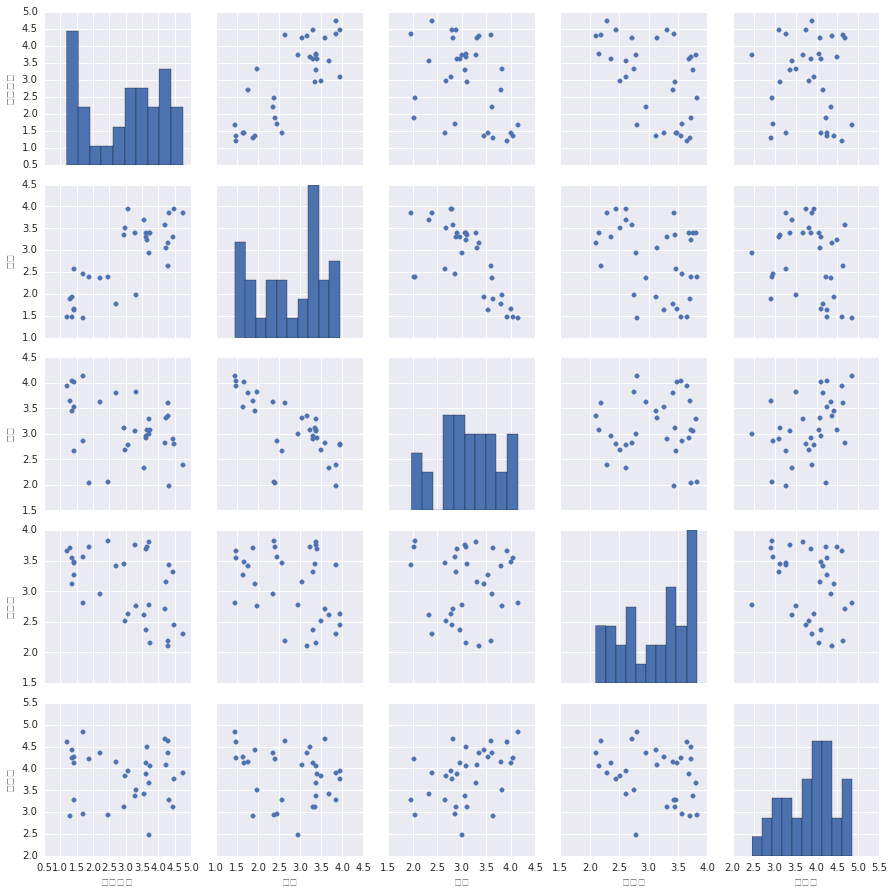

In [124]:
sns.pairplot(izakaya)
sns.plt.show()